##Silahkan kerjakan Final Project mu disini ya ☺️🙏

# **Prediksi Harga Mobile Phone**
Link Dataset: [Here](https://drive.google.com/file/d/1BEzYGaWuiFmXAXtrQLVbFmqCCJ9-GzHK/view?usp=sharing)



Here is the Case:

Seorang calon pembeli smartphone merasa bingung memilih ponsel yang sesuai dengan kebutuhan dan anggarannya. Dengan banyaknya pilihan di pasaran, ia kesulitan membandingkan fitur seperti RAM, kapasitas baterai, kualitas kamera, prosesor, hingga apakah ponsel tersebut mendukung fast charging atau tidak. Untuk membantu pengambilan keputusan, calon pembeli ini memiliki dataset spesifikasi ponsel yang mencakup informasi seperti nama ponsel, perusahaan, rating, spesifikasi teknis (RAM, baterai, kamera, layar, prosesor), dukungan jaringan (3G, 4G, 5G, VoLTE), versi Android, dan harga ponsel.
Sebagai seorang machine learning engineer, kamu akan menggunakan Linear Regression untuk memprediksi harga ponsel berdasarkan spesifikasinya. Dengan menganalisis hubungan antara spesifikasi ponsel dan harga, model ini dapat memperkirakan berapa harga yang wajar untuk ponsel dengan fitur tertentu. Prediksi ini akan membantu calon pembeli membuat keputusan yang lebih tepat, memahami apakah ponsel tersebut worth it dibandingkan dengan spesifikasi yang ditawarkan, serta memudahkan mereka dalam memilih ponsel sesuai kebutuhan dan anggaran.
1.	Name: This column contains the name of the mobile phone.
2.	Rating: This column contains the ratings given to the phone. the minimum rating is 0. and maximum rating is 5.
3.	Spec_score: This column contains the score given to the phone on the basic of its specifications. This minimum value is 0 and maximum value is 100.
4.	No_of_sim: This column contains whether the phone is dual sim, has 3g, 4g, 5g, volte.
5.	RAM: This column contains the information about the RAM of the phone
6.	Battery: This column provides information about battery specification of the phone.
7.	Display: This column contains information about the screen size of the phone.
8.	Camera: This column provides information about the camera, rear and front.
9.	External_Memory: This column contains information whether a device support external memory and
10.	how much.
11.	Android_version: This column tells us about the android version of the phone.
12.	Price: Price of the phone.
13.	Company: The company to which the phone belongs.
14.	Inbuilt_memory: This column provides information about the inbuilt memory of the phone.
15.	fast_charging: It contains whether the device supports fast charging or not. if yes then how much.
16.	Screen_resolution: This describes the screen resolution of the phone.
17.	Processor: This column gives information about the processor of the phone.
18.	Processor_name: This column describes the name of the processor.


### Import library

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **Data Preparation**

## *Pengumpulan data*

In [125]:
# mengambil dataset dan menampilkan data
df = pd.read_csv('/content/mobile phone price prediction.csv')
# external memory tidak masuk
# company tidak masuk
# android version tidak masuk
# fast charging tidak masuk
df.head(5)

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


## *Identifikasi setiap fitur/kolom*

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

In [127]:
# mencari tau data type dan indentifikasi setiap fitur dan kolom
df.value_counts("Rating")
df.value_counts("Spec_score")
df.value_counts("No_of_sim")
df.value_counts("Ram")
df.value_counts("Battery")
df.value_counts("Display")
df.value_counts("Camera")
df.value_counts("Screen_resolution")
df.value_counts("Processor")
df.value_counts("Processor_name")
# terdapat data yang error pada kolom: Ram, Battery

,count
Processor_name,
Snapdragon 8+ Gen1,58
Snapdragon 8 Gen2,55
Snapdragon 8 Gen3,44
Snapdragon 695,36
Snapdragon 680,34
...,...
Snapdragon 888+,1
Snapdragon MSM8937,1
Snapdragon SM4375,1


In [128]:
# cek baris dan kolom
df.shape

(1370, 18)

## *Mendeskripsikan data*

In [129]:
# mendeskripsikan data number(float dan integer)
df.describe()

,Unnamed: 0,Rating,Spec_score
count,1370.000000,1370.000000,1370.000000
mean,684.500000,4.374416,80.234307
std,395.629246,0.230176,8.373922
min,0.000000,3.750000,42.000000
25%,342.250000,4.150000,75.000000
50%,684.500000,4.400000,82.000000
75%,1026.750000,4.550000,86.000000
max,1369.000000,4.750000,98.000000


In [130]:
# mendeskripsikan data object
df.describe(include='object')

,Name,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
count,1370,1370,1370,1370,1370,1370,1370,927,1370,1370,1351,1281,1368,1342,1370
unique,1334,9,16,89,89,347,85,23,449,26,10,38,141,14,276
top,Realme Narzo N55 (6GB RAM + 128GB),"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,5000 mAh Battery,6.7 inches,50 MP + 2 MP Dual Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"29,990",Vivo,128 GB inbuilt,18W Fast Charging,1080 x 2400 px,Octa Core,Snapdragon 8+ Gen1
freq,3,818,528,693,158,81,233,280,37,186,644,157,357,1237,58


## *Identifikasi missing value*

In [131]:
# identifikasi missing value
df.isnull().sum()

,0
Unnamed: 0,0
Name,0
Rating,0
Spec_score,0
No_of_sim,0
Ram,0
Battery,0
Display,0
Camera,0
External_Memory,0


## *Identifikasi outlier*

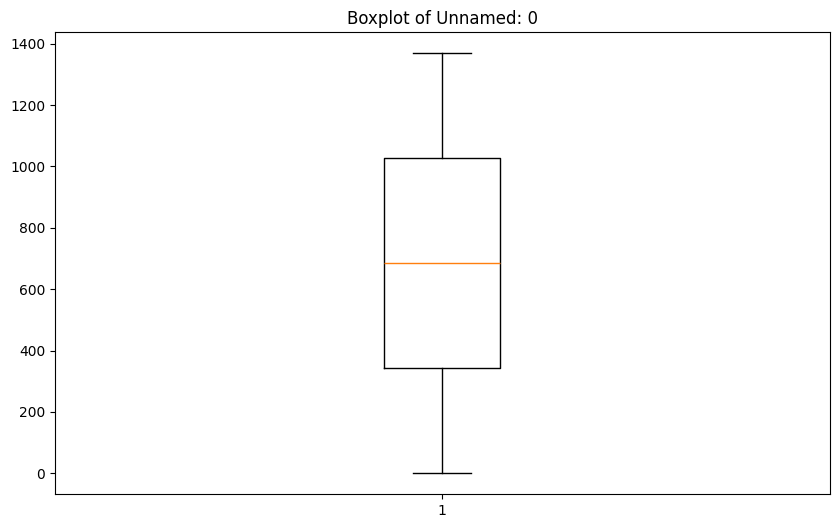

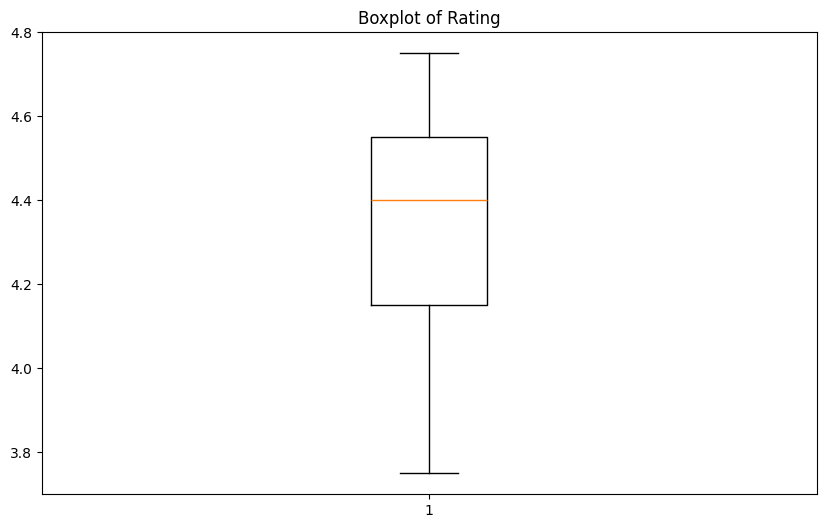

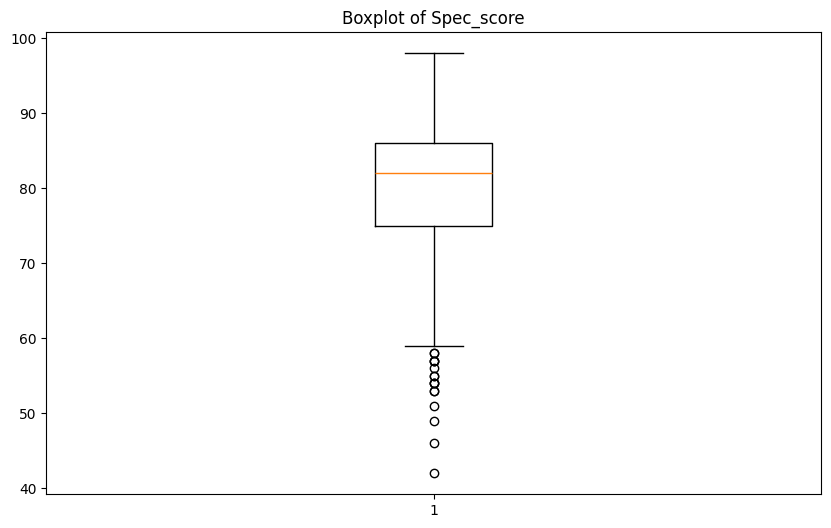

In [132]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
  plt.figure(figsize=(10, 6))
  plt.boxplot(df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

## *identifikasi data duplicate*

In [133]:
df.duplicated().sum()

np.int64(0)

## *Univariate, Bivariate, dan Multivariate Analysis*

In [134]:
# Univariate analysis

<Axes: >

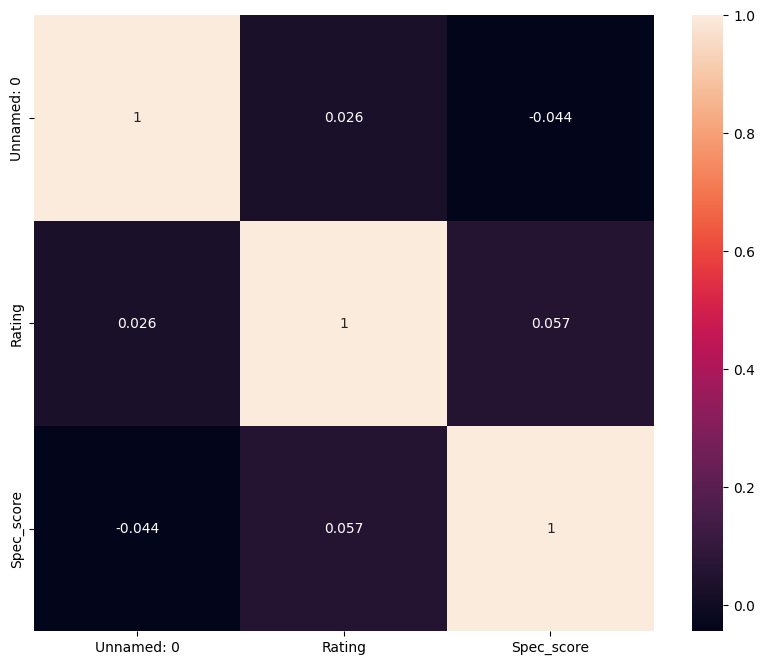

In [135]:
# bivariate analysis
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)

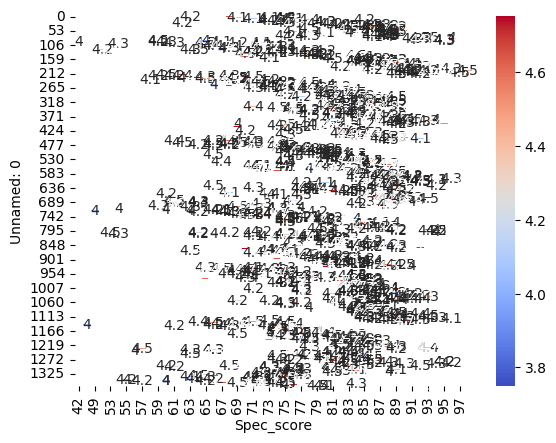

In [138]:
#multivariate Analysis
result = pd.pivot_table(data=df, index = 'Unnamed: 0',columns = 'Rating', values = 'Spec_score')
sns.heatmap(result, annot=True, cmap='coolwarm')
plt.show()

## *EDA*

# **Data Pre-Processing**

In [137]:
df2 = df.drop(columns=['company', 'Android_version', 'External_Memory', 'fast_charging'], axis=1, inplace=False)
df2.head(5)


,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,Price,Inbuilt_memory,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"9,999",128 GB inbuilt,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"9,990",32 GB inbuilt,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"11,999",64 GB inbuilt,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"11,999",64 GB inbuilt,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"11,999",64 GB inbuilt,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


## *Mengidentifikasi Mean-Median-Modus*